In [1]:
#importing needed modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
! pip install pycaret

  Using cached pycaret-3.2.0-py3-none-any.whl.metadata (17 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl.metadata (12 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached pyod-1.1.2-py3-none-any.whl
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached sktime-0.21.1-py3-none-any.whl.metadata (25 kB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached dash-2.14.2-py3-none-any.whl.metadata (11 kB)
Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl (614 kB)

In [5]:
from pycaret.classification import *

#pycaret is the library used for Python that automates machine learning workflows. Fast + Explainable + Scalable 

# Load the dataset

In [7]:
df=pd.read_csv(r"C:\Users\pk859\OneDrive\Desktop\datasets\data for breast cancer detection.csv")

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
#deleting the not required columns from the dataset
df = df.drop(columns=["id","Unnamed: 32"],axis=1)

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# EXPLORATORY DATA ANALYSIS

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()

In [22]:
df["diagnosis_encoded"] = label_encoder.fit_transform(df["diagnosis"])

In [17]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [26]:
df_temp = df.drop(columns=["diagnosis"],axis=1)

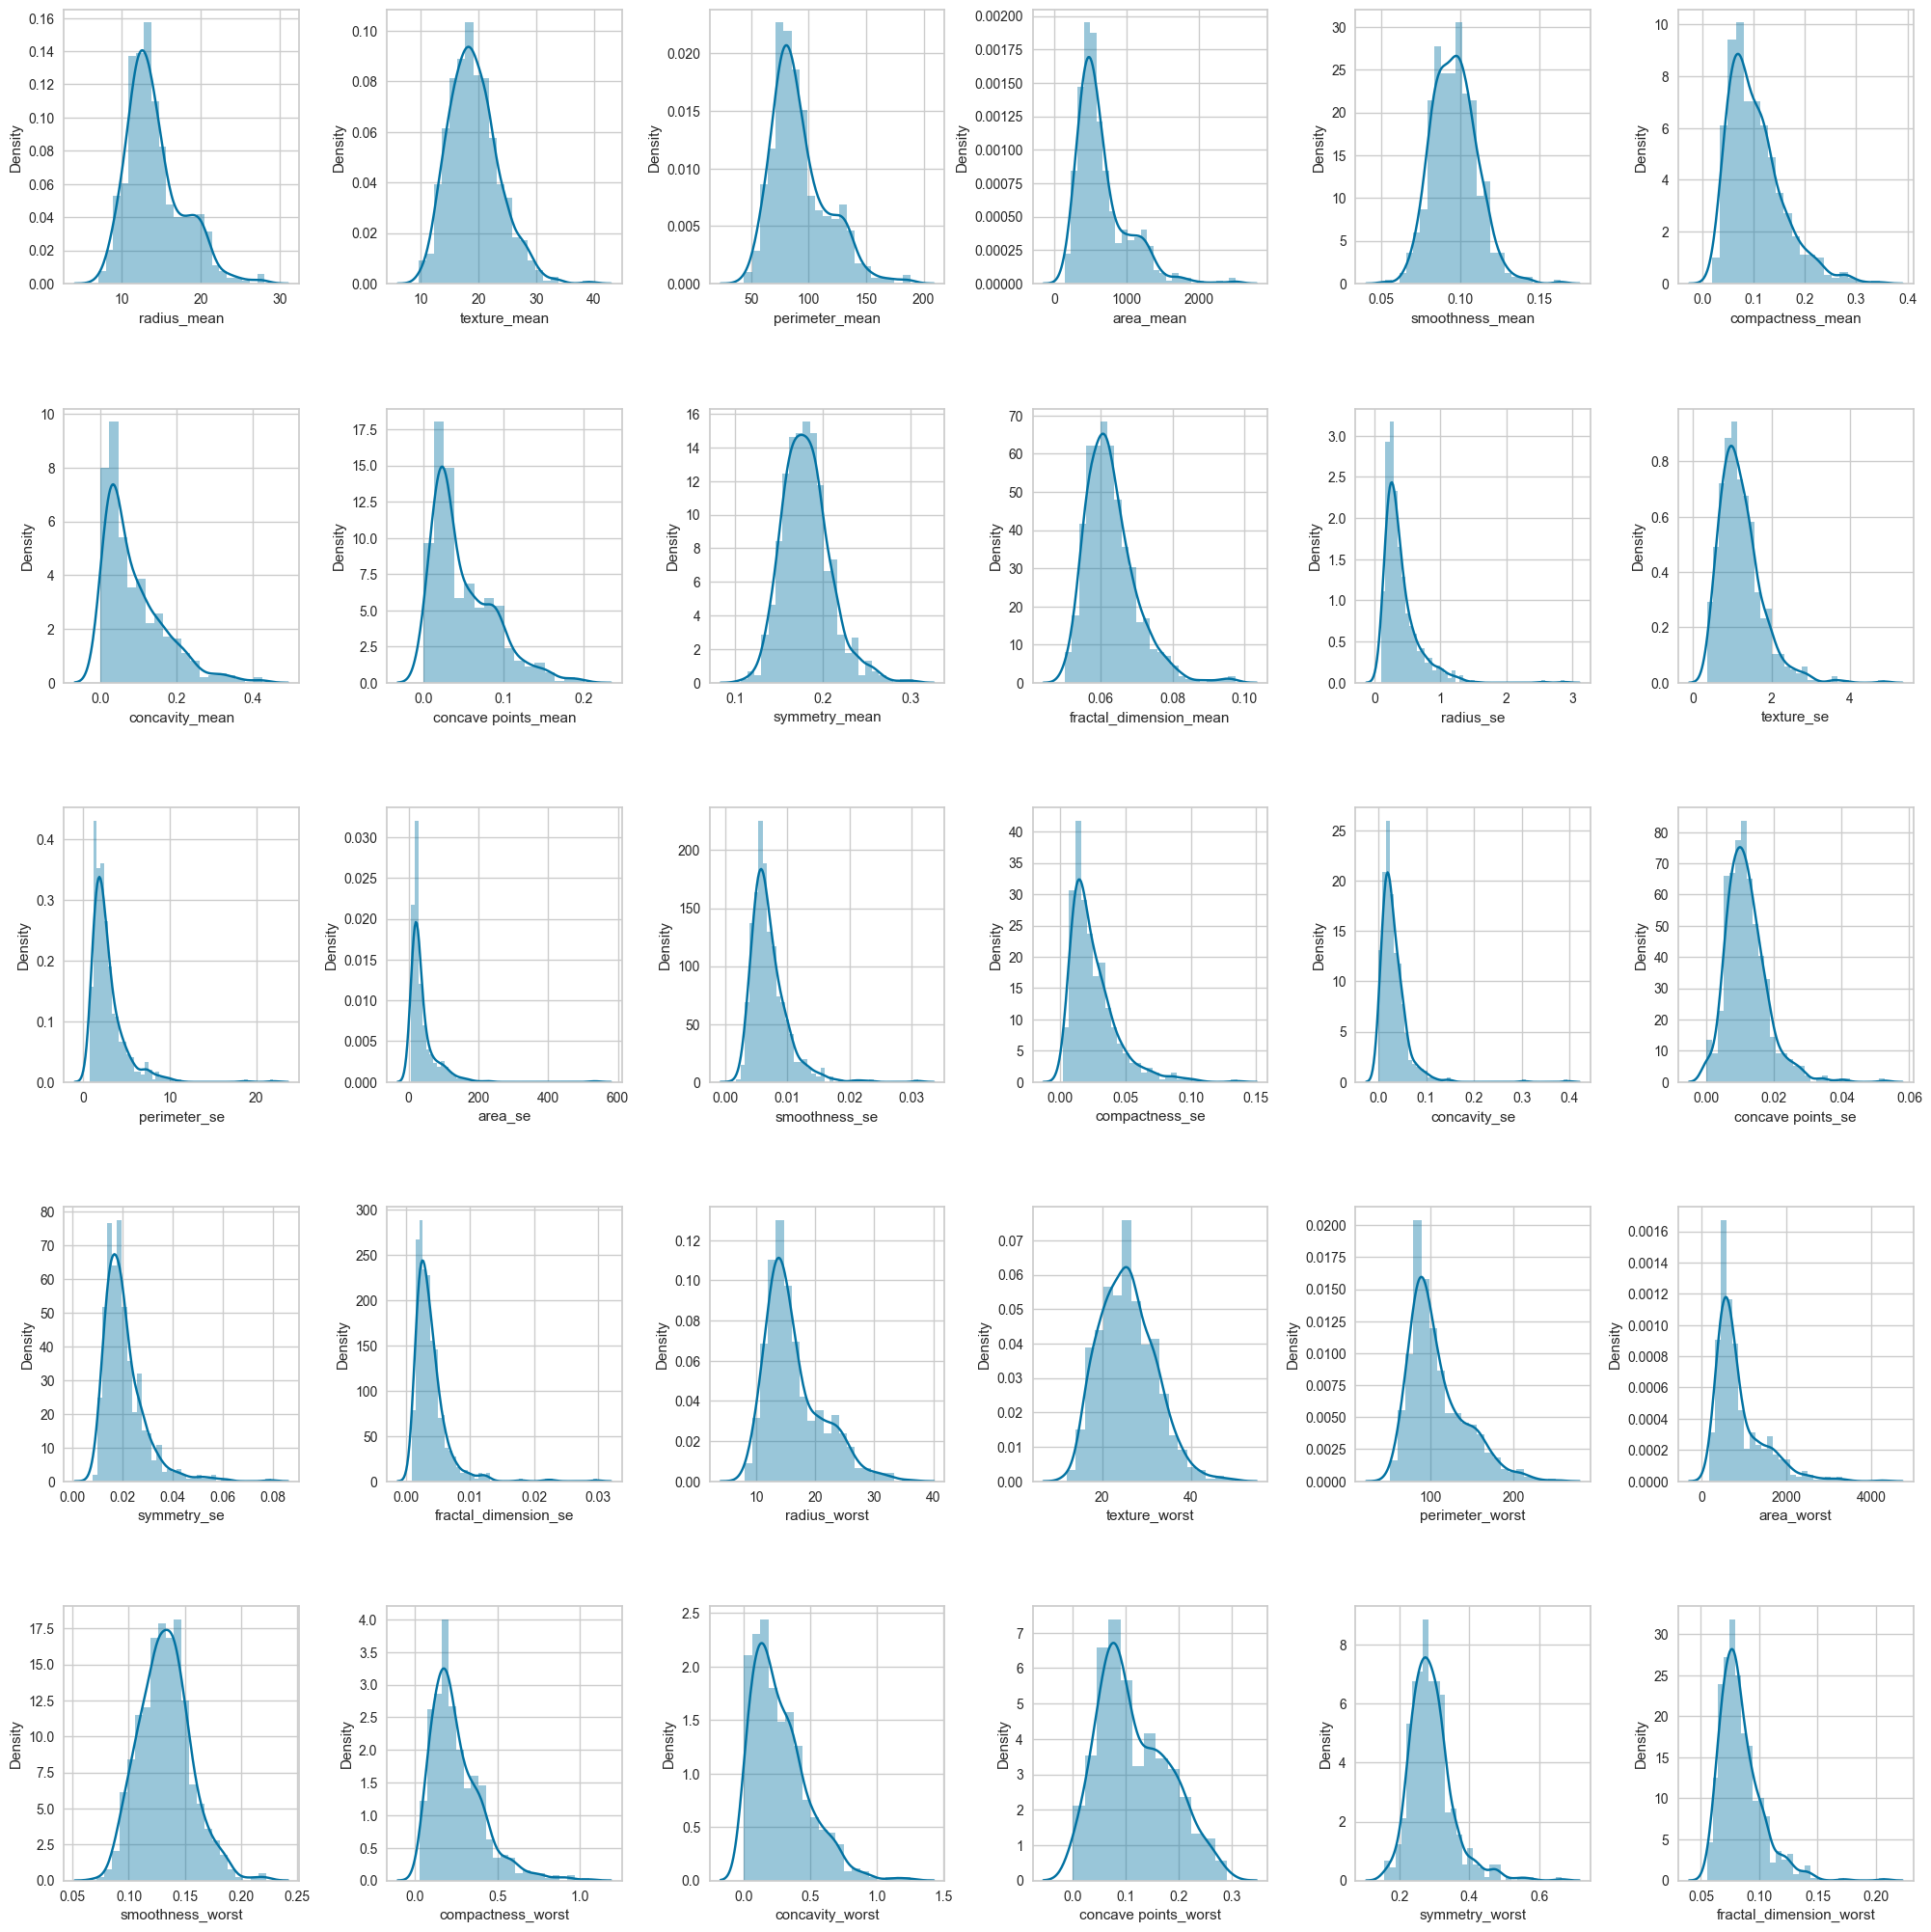

In [31]:
#create dist_plot
fig, ax=plt.subplots(ncols=6, nrows=5, figsize=(20,20))
index=0
ax= ax.flatten()

for col in df_temp.columns:
    if index < len(ax): 
        sns.distplot(df[col], ax=ax[index])
        index+=1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

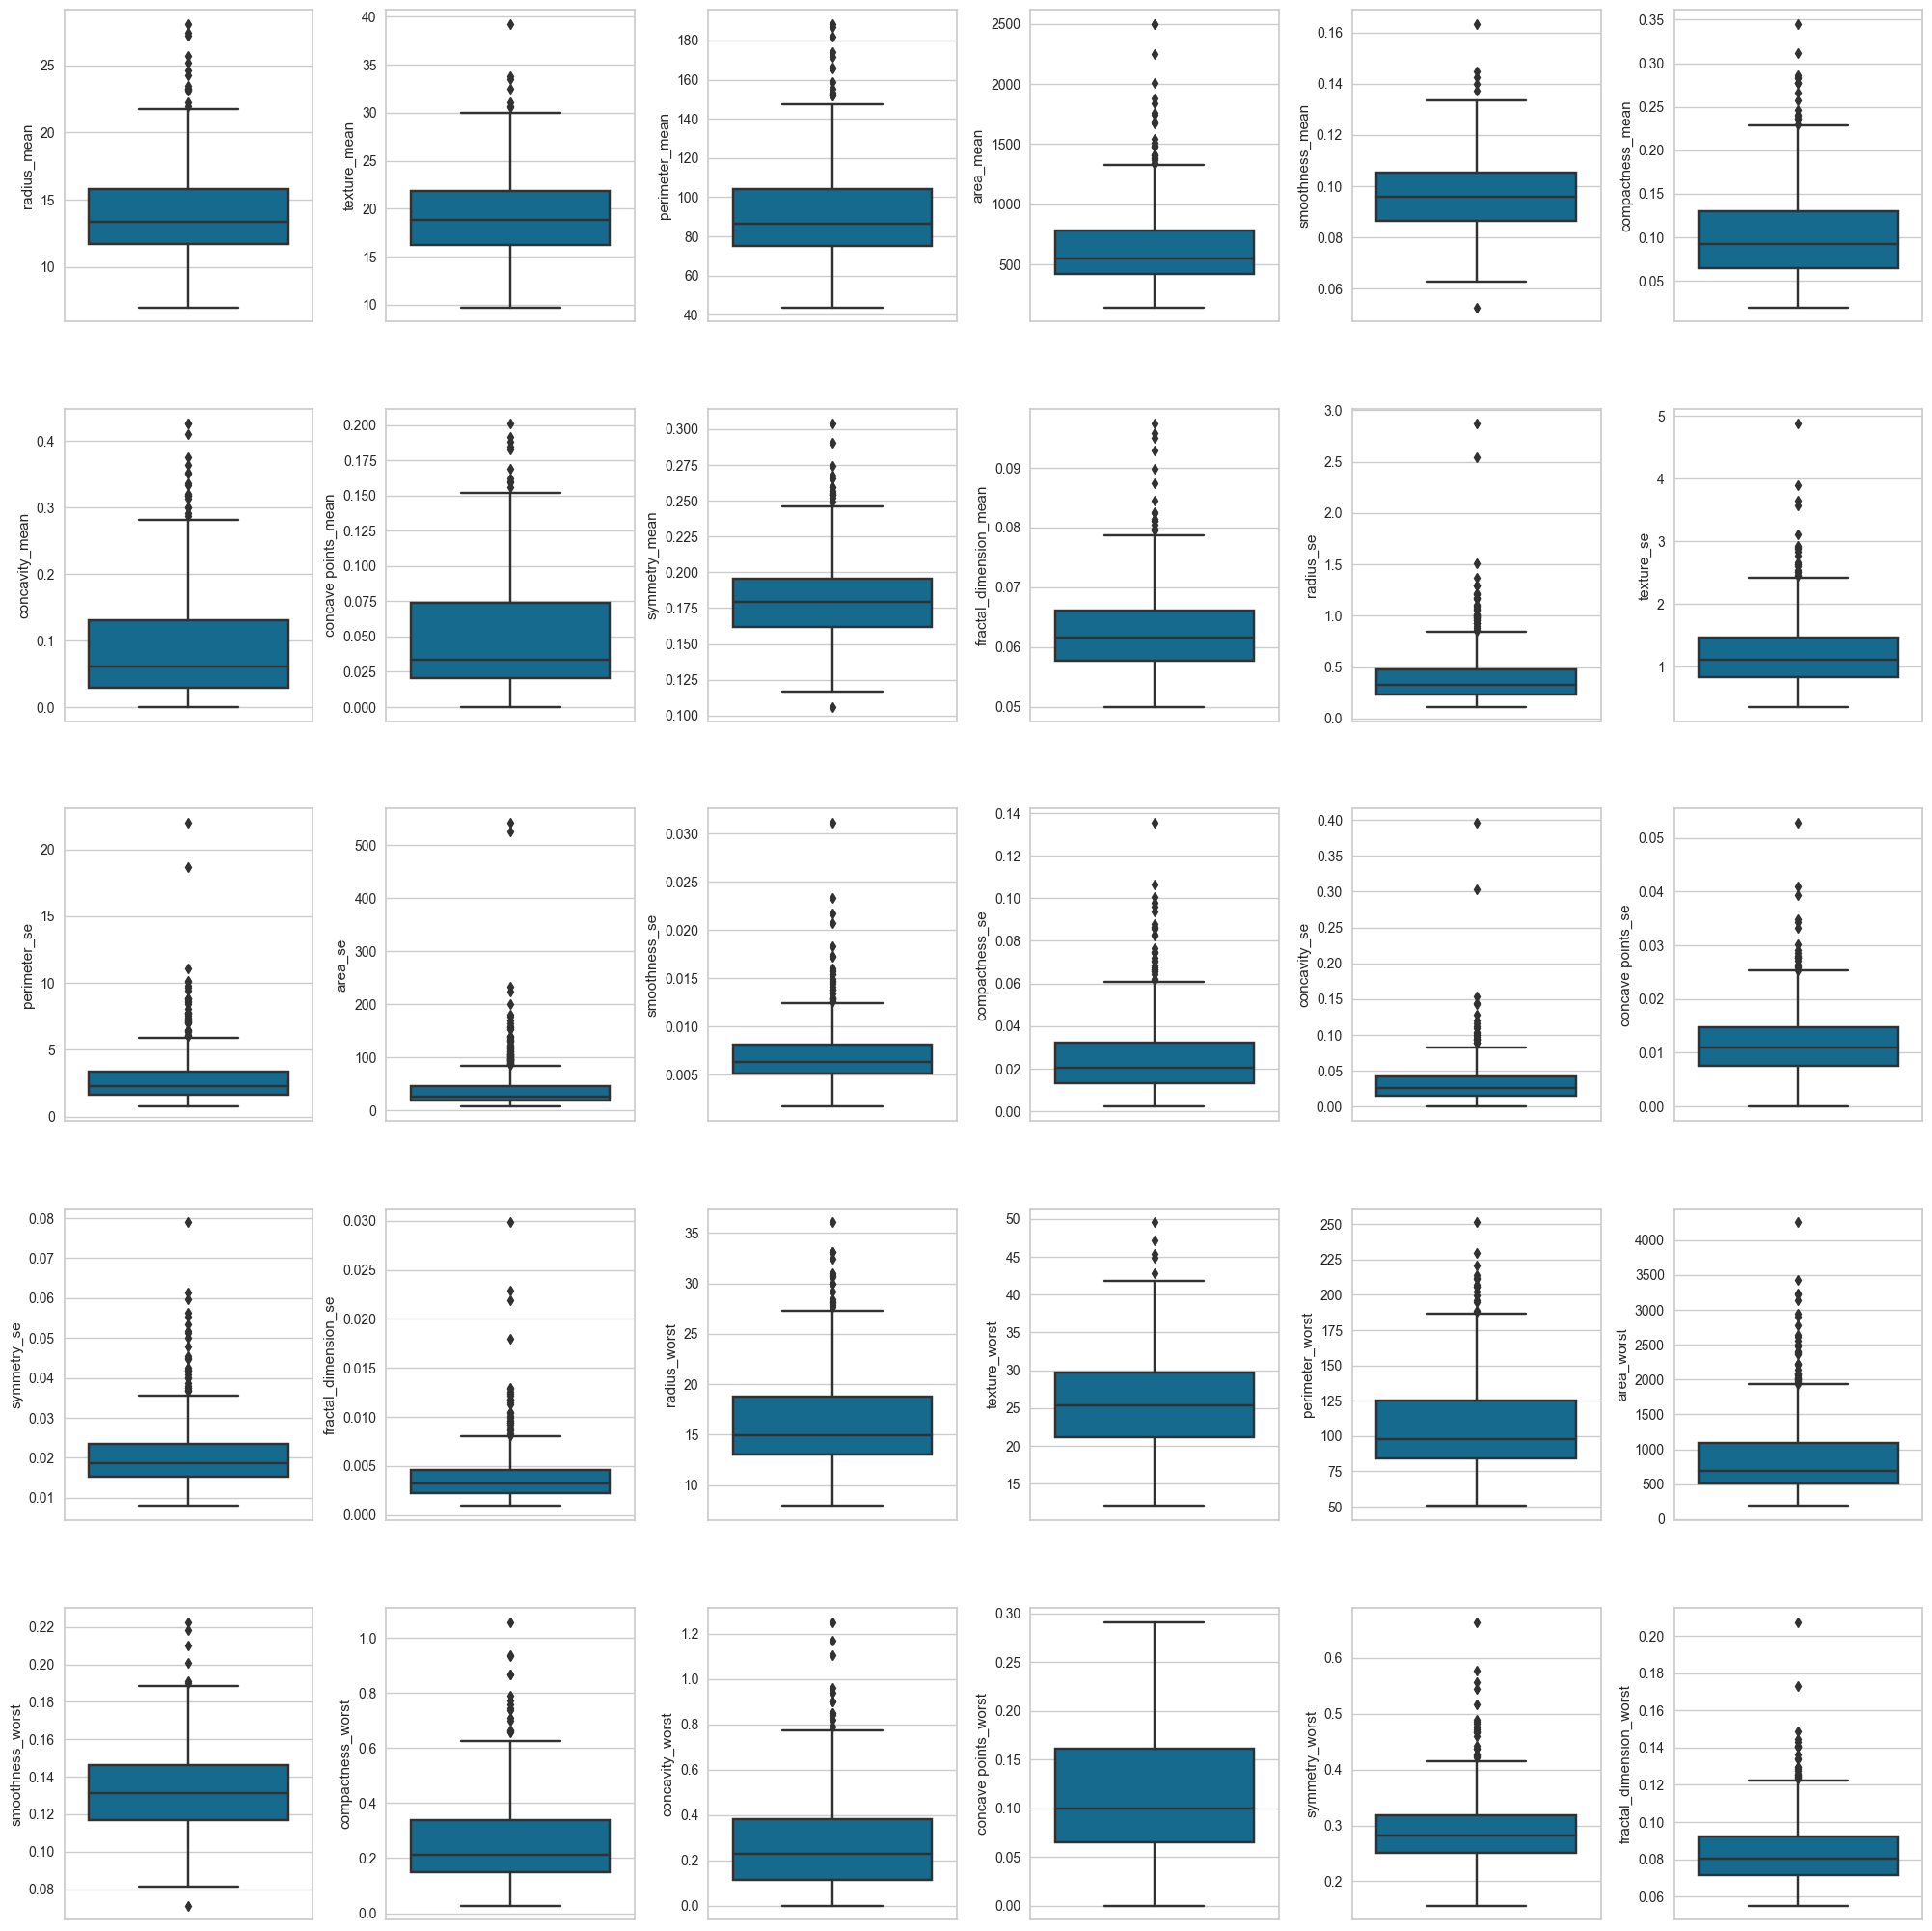

In [30]:
#creating box_plot
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20,20))
index=0
ax=ax.flatten()

for col in df_temp.columns:
    if index < len(ax):
        sns.boxplot(y=col, data=df, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# creating and training the model

In [32]:
#setup the data
clf = setup(df, target="diagnosis")

,Description,Value
0,Session id,5675
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,31
9,Preprocess,True


In [33]:
#train_test  the models
compare_models()    

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0170
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0170
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0160
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1490
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0160
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0170
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1040
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0900
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0450
lr,Logistic Regression,0.9925,0.9989,0.9925,0.9925,0.9924,0.9838,0.9839,0.7520


GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
#selecting the best model
from pycaret.classification import create_model

model = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9250,0.9893,0.9250,0.9251,0.9244,0.8378,0.8391
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [40]:
#hyper parameters tunning
best_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


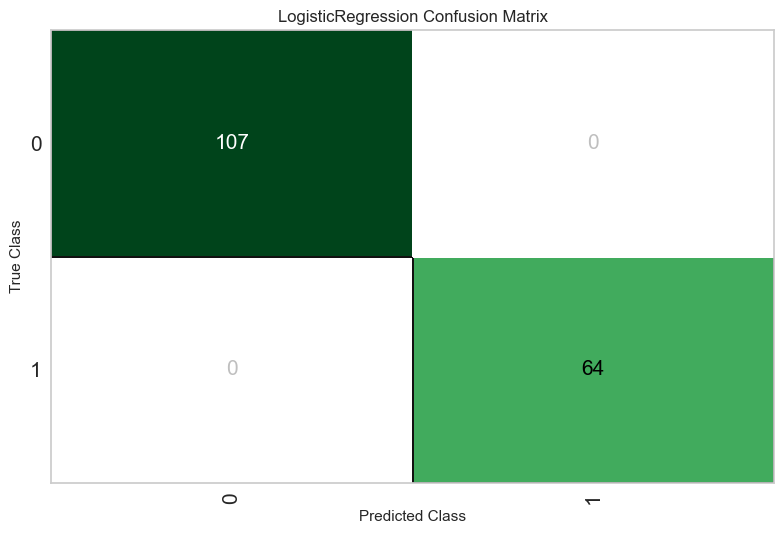

In [43]:
# lptting the results
plot_model(estimator=best_model, plot="confusion_matrix")